# Churn
El término Churn hace referencia a la cancelación de clientes, es decir, se refiere a los clientes que se dan de baja de una empresa en un periodo de tiempo determinado. Es una métrica indispensable a la hora de conocer el motivo de la pérdida de clientes y gracias a él, poder elaborar estrategias de marketing que te permitan obtener una mayor fidelización de clientes.

El problema del abandono de clientes es una constante en sectores en los que los clientes se tienen que suscribir o abonar a un determinado servicio como por ejemplo el sector de las telecomunicaciones. La insatisfacción del cliente o la alta rivalidad de la competencia se pueden presentar como dos de las principales causas de esta pérdida de clientes. Luchar contra este problema se antoja clave para poder lograr un servicio beneficioso para la compañía. Obtener un cliente nuevo puede ser mucho más complicado que retener a los actuales por lo que un alto abandono de clientes se convierte en un problema importante. Conseguir la fidelidad de los clientes tiene que ser un objetivo para todas las empresas de este tipo de sectores.

## 1. Importar el data set

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [101]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
df.shape

(7043, 21)

##### Observacion 1.1: 
Hay un total de 7043 clientes. 

##### Observacion 1.2: 
Cada cliente es caracterizado por 20 variables independientes y 1 variable independiente que es la bandera Churn que indica si el cliente abandona la empresa o no (churn=Yes)

In [103]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [104]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##### Observacion 1.3: 
Hay 6 variables independientes (gender, SeniorCitizen, Partner, Dependents, PhoneServices, PaperlessBilling) que contienen 2 clases (Yes/No, 0/1). 

##### Observacion 1.4: 
Hay 10 variables independientes (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod) que contienen 3 o mas clases. 

Estas caracteristicas son categoricas ya que no presentan un valor real sino una categoria. En lo adelante estas variables independientes seran referenciadas como caracteristicas categoricas (de tener 2 clases seran caracteristicas categoricas binaras.)

##### Observacion 1.5: 
Hay 3 variables independientes (tenure, MontlyCharges, TotalCharges) que continenen valores reales.

Estas caracteristicas son continuas ya que representan valores numericos reales. En lo adelante estas varibles independientes seran referenciadas como variables continuas.

##### Observacion 1.6: 
La variable customerID no resulta de importancia ya que al parecer se refiere a la identificacion del cliente.

In [105]:
df.drop(['customerID'], axis=1, inplace=True)

## 2. Analisis Exploratorio (EDA)

In [106]:
df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Observacion 2.1: 
No hay presencia de valores nulos en el data set, esto puede suponer una simplificacion el proceso de limpieza y preparacion de datos ya que no es necesario tratar con valores faltantes, ademas puede simplificar la creacion y precision del modelo de Machine Learning (ML), esto no implica que se realice una exploaracion exhaustiva para estar seguros que no hubo problemas en la recoleccion de datos. 

In [107]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

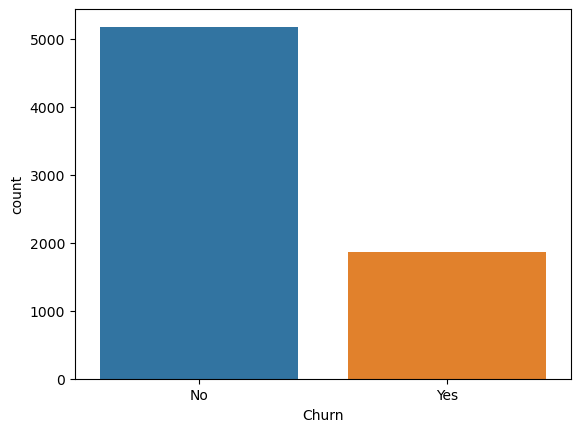

In [108]:
sns.countplot(data=df, x='Churn')

##### Observacion 2.2: 
La variable objetivo (Churn) se encuentra desbalanceada. La clase negativa (Churn=No) es mucho mas grande que la clase positiva (Churn=Yes), es posible que esa distribucion pueda influir de una forma negativa en el comportamiento del modelo de Machine Learning.

Tener una variable objetivo desbalanceada implica sesgo en la prediccion ya que el modelo puede tener dificultades para predecir correctamente la clase minoritaria (Churn=Yes) que es la de mayor importancia en el problema abordado. Para resolver esta problematica bien se pueden aplicar tecnicas de balanceo como el submuestreo de la clase mayoritaria o el sobremuestreo de la clase minoritaria.

In [109]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [110]:
binary_cols # Caracteristicas categoricas con 2 clases

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [111]:
# Caracteristicas categoricas con mas de 2 clases
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

### Caracteristicas categoricas binarias

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

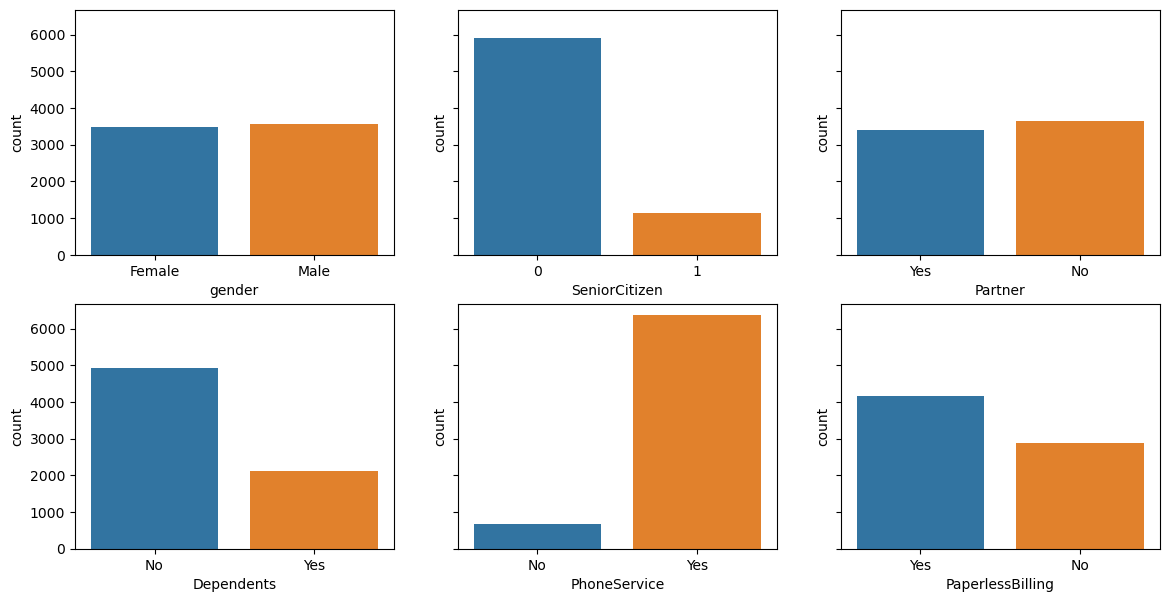

In [112]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharey=True)

sns.countplot(data=df, x='gender' , ax=axes[0,0])
sns.countplot(data=df, x='SeniorCitizen', ax=axes[0,1])
sns.countplot(data=df, x='Partner', ax=axes[0,2])
sns.countplot(data=df, x='Dependents', ax=axes[1,0])
sns.countplot(data=df, x='PhoneService', ax=axes[1,1])
sns.countplot(data=df, x='PaperlessBilling', ax=axes[1,2])

##### Observacion 2.3: 
Segun las graficas anteriores gran parte de los clientes no tiene la mayoria de edad y cuenta con un servicio telefonico. Tendran esto alguna repercusion en la tasa de abandono?

In [113]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [114]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [115]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


##### Observacion 2.3: 
Resulta complicado llegar a una conclusion apresurada de cuales serian las variables independientes que influyen en que un cliente tome la decision de abandonar la empresa, es necesario continuar con la exploracion y la creacion del modelo.

### Caracteristicas categoricas

<AxesSubplot:xlabel='Contract', ylabel='count'>

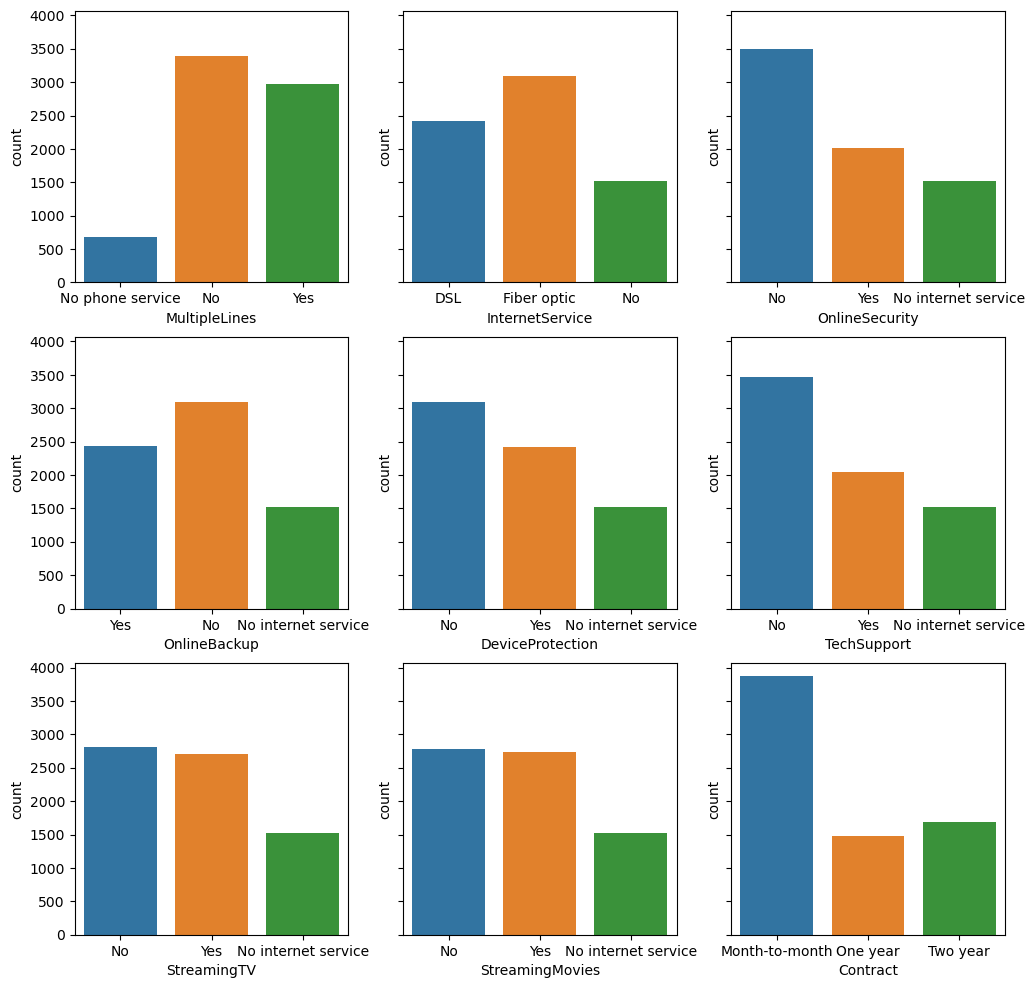

In [116]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True)

sns.countplot(data=df, x='MultipleLines' , ax=axes[0,0])
sns.countplot(data=df, x='InternetService', ax=axes[0,1])
sns.countplot(data=df, x='OnlineSecurity', ax=axes[0,2])
sns.countplot(data=df, x='OnlineBackup', ax=axes[1,0])
sns.countplot(data=df, x='DeviceProtection', ax=axes[1,1])
sns.countplot(data=df, x='TechSupport', ax=axes[1,2])
sns.countplot(data=df, x='StreamingTV', ax=axes[2,0])
sns.countplot(data=df, x='StreamingMovies', ax=axes[2,1])
sns.countplot(data=df, x='Contract', ax=axes[2,2])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

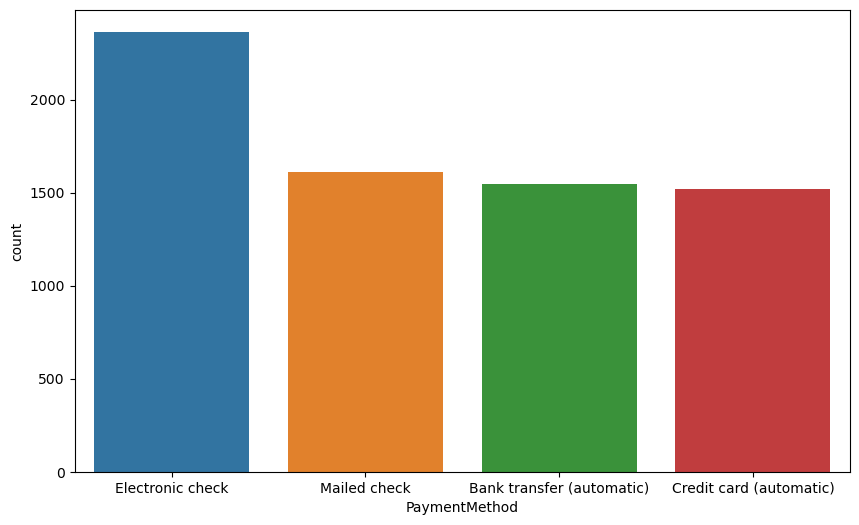

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod')

### Variables continuas

In [118]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) 
df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

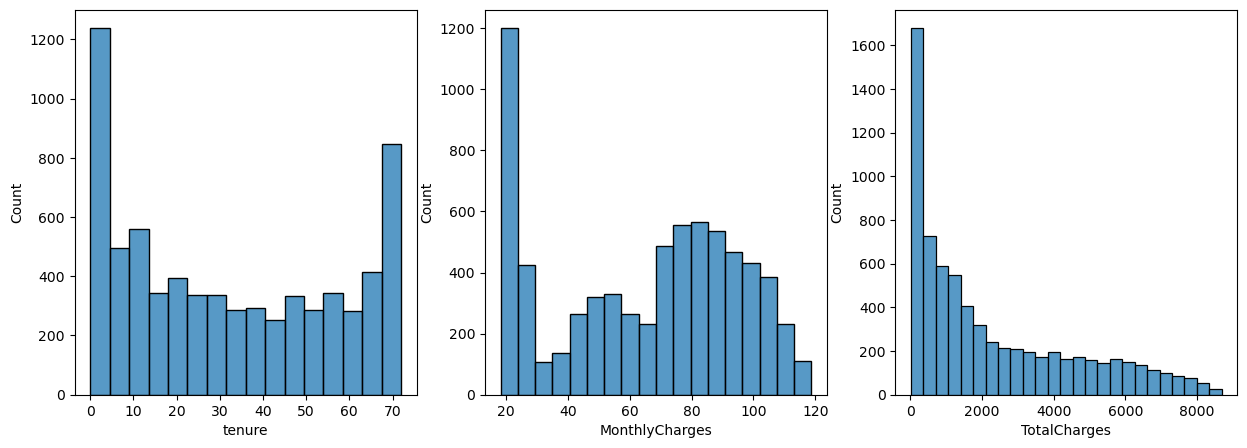

In [119]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(df["tenure"], ax=axes[0])
sns.histplot(df["MonthlyCharges"], ax=axes[1])
sns.histplot(df["TotalCharges"], ax=axes[2])

## 3. Preprocesamiento de Datos

##### Observacion 3.1: 
Se hace necesario convertir las caracteristicas categoricas en numericas porque los modelos de Machine Learning trabajan con numeros. 

##### Observacion 3.2: 
Tambien se hace necesario escalar las variables continuas ya que variables con grandes valores daran mas importancia a las variables con valores mas altos, lo que afectaria la precision del modelo. 

In [120]:
gender_numeric = {'Male':1, 'Female':0}
df.gender.replace(gender_numeric, inplace=True)

In [121]:
PhoneService_numeric = {'Yes':1, 'No':0}
df.PhoneService.replace(PhoneService_numeric, inplace=True)

In [122]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Contract']
df_1 = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [127]:
df_1.head()

,gender,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0.013889,0,0.115423,0.001275,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,1,0.472222,1,0.385075,0.215867,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0.027778,1,0.354229,0.010310,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0.625000,0,0.239303,0.210241,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0.027778,1,0.521891,0.015330,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [128]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
c = sc.fit_transform(df[['TotalCharges']])

In [129]:
df_1['tenure'] = a
df_1['MonthlyCharges'] = b
df_1['TotalCharges'] = c

In [130]:
df_1.shape

(7043, 31)

### Correlacion

La correlacion mide la relacion lineal entre dos variables. Las caracteristicas con alta correlacion son mas linealmente dependientes y tienen casi el mismo efecto sobre la variable objetivo. Entonces cuando dos variables tienen una correlacion alta, podemos descartar una de ellas. 

Primeramente estudiaremos la correlación de las caracteristicas. Para esto aplicamos la correlación de spearman a dos Dataframes:

1. Un primer dataFrame con las caracteristicas y la variable objetivo con el objetivo de obtener las caracteristicas con la correlación mas alta con Churn.
2. Un segundo dataFrame solamente con las caracteristicas para determinar las caracteristicas mas correlacionadas entre ellas.

<AxesSubplot:>

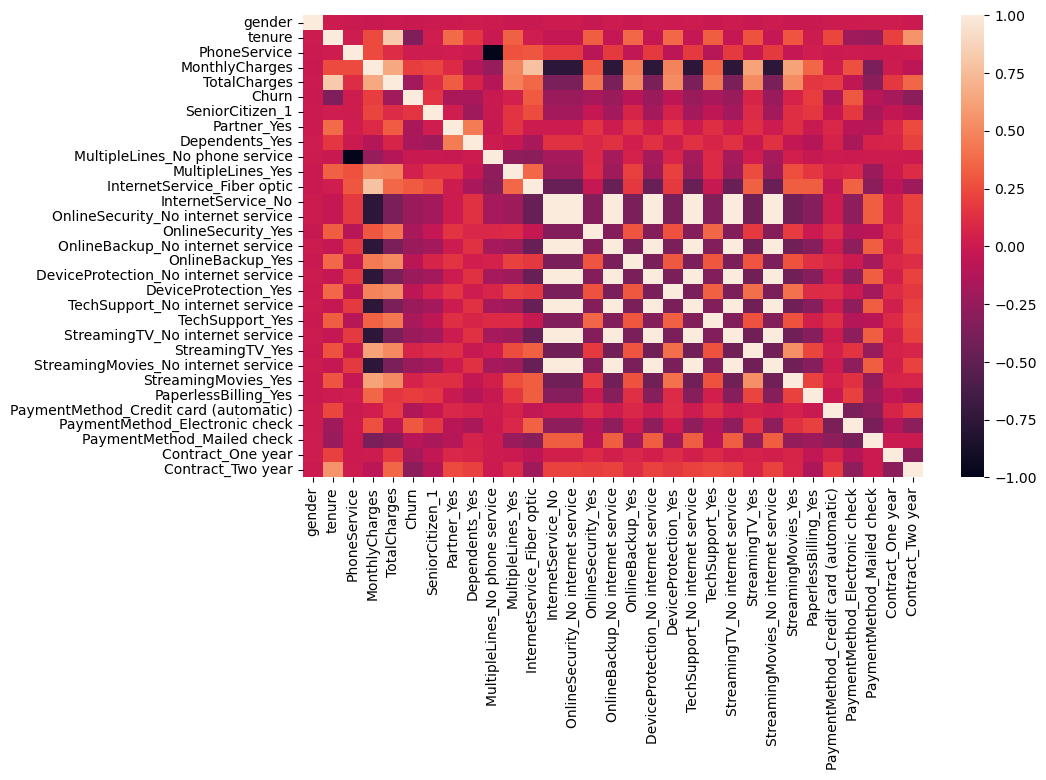

In [132]:
#Calcular la matriz de correlacion
corr_matrix = df_1.corr()

#Graficar la matriz de correlacion como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix)

In [133]:
corr_matrix = df_1.corr(method='spearman')

correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features), correlated_features)

7 {'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'MultipleLines_No phone service'}


In [134]:
feat_matrix = df_1.drop('Churn', axis=1).corr(method='spearman')

corr_features = set()

for i in range(len(feat_matrix.columns)):
    for j in range(i):
        if abs(feat_matrix.iloc[i, j]) > 0.9:
            colname = feat_matrix.columns[i]
            corr_features.add(colname)

print(len(corr_features), corr_features)

7 {'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'MultipleLines_No phone service'}


In [135]:
if correlated_features == corr_features:
    print("Are equals")
else:
    print("The features arn´t equals")

Are equals


In [136]:
MC_features = list(set(correlated_features) | set(corr_features))

print(len(MC_features), MC_features)

7 ['OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'MultipleLines_No phone service']


##### Observacion 3.3: 
Luego de realizar el analisis de las correlaciones se determina que las variables MultipleLines, TechSupport, OnlineSecurity, OnlineBackup, StreamingMovies, StreamingTV, DeviceProtection estan correlacionadas y afectaria esto en la creacion del modelo de Machine Learning.

In [137]:
df_1.columns

Index(['gender', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [138]:
df_1.drop(['MultipleLines_No phone service','MultipleLines_Yes'], axis=1, inplace=True)
df_1.drop(['OnlineSecurity_No internet service','OnlineSecurity_Yes'], axis=1, inplace=True)
df_1.drop(['TechSupport_No internet service', 'TechSupport_Yes'], axis=1, inplace=True)
df_1.drop(['OnlineBackup_No internet service', 'OnlineBackup_Yes'], axis=1, inplace=True)
df_1.drop(['StreamingTV_No internet service', 'StreamingTV_Yes'], axis=1, inplace=True)
df_1.drop(['StreamingMovies_No internet service', 'StreamingMovies_Yes'], axis=1, inplace=True)
df_1.drop(['DeviceProtection_No internet service', 'DeviceProtection_Yes'], axis=1, inplace=True)

In [139]:
df_1.head()

,gender,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0.013889,0,0.115423,0.001275,0,0,1,0,0,0,1,0,1,0,0,0
1,1,0.472222,1,0.385075,0.215867,0,0,0,0,0,0,0,0,0,1,1,0
2,1,0.027778,1,0.354229,0.010310,1,0,0,0,0,0,1,0,0,1,0,0
3,1,0.625000,0,0.239303,0.210241,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0.027778,1,0.521891,0.015330,1,0,0,0,1,0,1,0,1,0,0,0


### Remuestreo

Como bien se concluyo en el inicio del analisis la variable objetivo presenta un desbalanceo en la distribucion de las clases y esto no es deseado para la creacion del modelo de Machine Learning. Se utilizara el metodo de sobremuestreo de la clase minoritaria lo cual significa aumentar el numero de muestras en esta clase seleccionando filas de manera aleatoria.

In [140]:
df_no = df_1[df_1.Churn == 0]
df_yes = df_1[df_1.Churn == 1]

print(len(df_no),len(df_yes))

5174 1869


In [141]:
df_yes_upsampled = df_yes.sample(n=len(df_no), replace=True, random_state=42)
print(len(df_yes_upsampled))

5174


In [142]:
df_upsampled = pd.concat([df_no, df_yes_upsampled], axis=0)

Text(0.5, 1.0, 'Distribucion de clases luego del sobremuestreo')

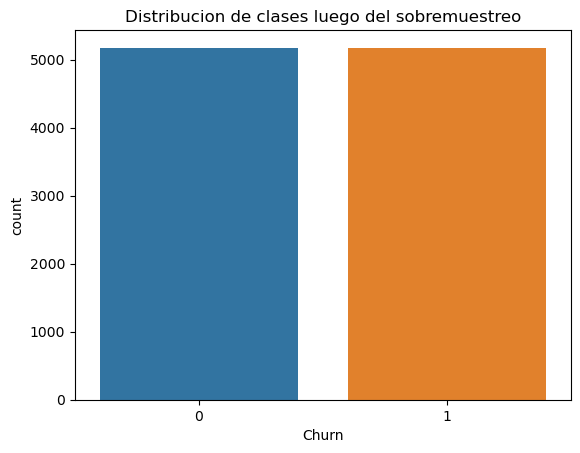

In [145]:
sns.countplot(data=df_upsampled, x='Churn').set_title('Distribucion de clases luego del sobremuestreo')

## 4. Modelos de ML

Luego de realizar una investigación sobre cuales podrian ser los modelos de Machine Learning que podrian responder eficientemente a la deteccion de la problematica en cuestion se determinan los siguientes modelos:

1. Regresiones
2. Arboles de decision
3. Maquinas de soporte de vectores
4. Redes neuronales artificiales

Siendo Maquinas de soporte de vectores y arboles de decision los usados con mayor frecuencia y los de mejor porcentaje de acierto. Es por eso que se toma la decision que seran esto modelos los desarrollados.

In [157]:
X = df_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = df_upsampled['Churn'] #target (dependent variable)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [159]:
#Funcion para visualizar las metricas
def print_scores(algorit_name, y_true, y_pred):
    print(algorit_name)
    
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy:", acc_score)
    
    pre_score = precision_score(y_true, y_pred)
    print("precision:", pre_score)
    
    rec_score = recall_score(y_true, y_pred)
    print("recall:", rec_score)
    
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score:", f_score) 

### Maquina de soporte de vectores

El Maquina de soporte de vectores es un modelo supervisado de aprendizaje con algoritmos asociados que analizan los datos y reconocen patrones, que se utiliza para la clasificación y el análisis de regresión en la Inteligencia de Negocios.

El Churn de clientes es un problema de clasificación entre "churn" y "no churn". Pero cuando el número de los ejemplos negativos es demasiado pequeño (cosa que suele ser habitual en la tasa de abandono de clientes), el rendimiento de la generalización del clasificador SVM debe ser débil, y los índices de error son insatisfactorios

In [160]:
#Crear el objeto de maquina de soporte de vectores y entrenarlo
mdl_SVC = SVC(kernel='rbf')
mdl_SVC.fit(X_train, y_train)

#Hacer prediccionones sobre el conjunto de entrenamiento y evualar
pred = mdl_SVC.predict(X_train)
print_scores('Maquina de soporte de vectores: Conjunto de entrenamiento', y_train, pred)

#Hacer prediccionones sobre el conjunto de prueba y evualar
pred_test = mdl_SVC.predict(X_test)
print_scores('\nMaquina de soporte de vectores: Conjunto de prueba', y_test, pred_test)

Maquina de soporte de vectores: Conjunto de entrenamiento
accuracy: 0.7743416284126601
precision: 0.7533333333333333
recall: 0.817261330761813
f1_score: 0.7739118807772204

Maquina de soporte de vectores: Conjunto de prueba
accuracy: 0.7657004830917874
precision: 0.7439134355275022
recall: 0.804093567251462
f1_score: 0.7654051918366187


In [161]:
confusion_matrix(y_train, pred)

array([[3020, 1110],
       [ 758, 3390]], dtype=int64)

##### Observacion 4.1: 
Luego de observar las metricas obtenidas del modelo Machine Learning se pueden extraer algunas conclusiones: 

### Arboles de decision

In [162]:
#Crear el objeto de bosque aleatorio y entrenarlo
mdl_tree = DecisionTreeClassifier()
mdl_tree.fit(X_train, y_train)

#Hacer prediccionones sobre el conjunto de entrenamiento y evualar
pred = mdl_tree.predict(X_train)
print_scores('Arboles de Decision: Conjunto de entrenamiento', y_train, pred)

#Hacer prediccionones sobre el conjunto de prueba y evualar
pred_test = mdl_tree.predict(X_test)
print_scores('\nArboles de Decision: Conjunto de prueba', y_test, pred_test)

Arboles de Decision: Conjunto de entrenamiento
accuracy: 0.9980671659821213
precision: 0.9968734968734969
recall: 0.9992767598842816
f1_score: 0.9980671580843108

Arboles de Decision: Conjunto de prueba
accuracy: 0.8719806763285024
precision: 0.8216398985629755
recall: 0.9473684210526315
f1_score: 0.8713257205298915


In [165]:
confusion_matrix(y_train, pred)

array([[4117,   13],
       [   3, 4145]], dtype=int64)

##### Observacion 4.2: 
La precision en el conjunto de entrenamiento es un 17% mas alta que la precision en el conjunto de prueba, lo cual indica  sobreajuste.

El sobreajuste es un comportamiento no deseado que ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento y no puede hacer predicciones precisas sobre datos nuevos, es decir es como si una persona aprendiera muchos conceptos de memoria pero no haya interiorizado ninguno.  

In [166]:
cv_KFold = KFold(n_splits=8, random_state=42, shuffle=True)

scores = cross_val_score(mdl_tree, X, y, cv=cv_KFold)
scores.mean()

0.8862579356683413

In [167]:
#Crear el objeto de bosque aleatorio y entrenarlo
mdl_tree1 = DecisionTreeClassifier(max_depth=8)
mdl_tree1.fit(X_train, y_train)

#Hacer prediccionones sobre el conjunto de entrenamiento y evualar
pred = mdl_tree1.predict(X_train)
print_scores('Arboles de Decision con hiperparametros modificado: Conjunto de entrenamiento', y_train, pred)

#Hacer prediccionones sobre el conjunto de prueba y evualar
pred_test = mdl_tree1.predict(X_test)
print_scores('\nArboles de Decision con hiperparametros modificado: Conjunto de prueba', y_test, pred_test)

Arboles de Decision con hiperparametros modificado: Conjunto de entrenamiento
accuracy: 0.8108238705001208
precision: 0.7793163132842925
recall: 0.8683702989392478
f1_score: 0.8101777763819992

Arboles de Decision con hiperparametros modificado: Conjunto de prueba
accuracy: 0.7893719806763285
precision: 0.7504244482173175
recall: 0.8615984405458089
f1_score: 0.7883665605213922


In [168]:
confusion_matrix(y_train, pred)

array([[3110, 1020],
       [ 546, 3602]], dtype=int64)